# dataset link

https://www.kaggle.com/datasets/kaggle/sf-salaries

In [1]:
# pip install matplotlib
# pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/Salaries.csv")
df.columns

/var/folders/7g/l7_y9q_j4md0vzbz99k5dpg40000gn/T/ipykernel_6924/3405475822.py:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/Salaries.csv")


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
df['BasePay'] = pd.to_numeric(df['BasePay'],errors = "coerce")
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors = "coerce")
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors = "coerce")
df['Benefits'] = pd.to_numeric(df['Benefits'],errors = "coerce")
df.drop(["Notes"],axis = 1,inplace = True)
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

# PYTHON CODE

In [6]:
df['BasePay'].mean()

66325.4488404877

# sql code

In [7]:
# SELECT AVG(BasePay) AS AverageBasePay
# FROM YourTableName;

# Q2: Which job title has the highest BasePay?


# PYTHON CODE

In [8]:
df.loc[df['BasePay'].idxmax()]['JobTitle']


'Chief of Police'

# sql code

In [9]:
# SELECT JobTitle
# FROM YourTableName
# WHERE BasePay = (SELECT MAX(BasePay) FROM YourTableName);

# Q3: How many unique job titles are there in the dataset?

# PYTHON CODE

In [10]:
df['JobTitle'].nunique()

2159

# sql code

In [11]:
# SELECT COUNT(DISTINCT JobTitle) AS NumUniqueJobTitles
# FROM YourTableName;

#### Q4: What is the total OvertimePay for each year?


# PYTHON CODE

In [12]:
df.groupby('Year')['OvertimePay'].sum().reset_index()


,Year,OvertimePay
0,2011,1.638388e+08
1,2012,1.846910e+08
2,2013,1.986214e+08
3,2014,2.059186e+08


# sql code

In [13]:
# SELECT Year, SUM(OvertimePay) AS TotalOvertimePay
# FROM YourTableName
# GROUP BY Year
# ORDER BY Year;

#### Q5: Which year had the highest average OtherPay?
df.groupby('Year')['OtherPay'].mean()

# PYTHON CODE

In [14]:
df.groupby('Year')['OtherPay'].mean()

Year
2011    3617.081926
2012    3653.437583
2013    3819.969007
2014    3505.421251
Name: OtherPay, dtype: float64

# sql code

In [15]:
# SELECT Year, AVG(OtherPay) AS AverageOtherPay
# FROM YourTableName
# GROUP BY Year
# ORDER BY AverageOtherPay DESC
# LIMIT 1;

#### Q6: What is the median TotalPay for each job title?


# PYTHON CODE

In [16]:
df.groupby('JobTitle')['TotalPay'].median()

JobTitle
ACCOUNT CLERK                                     49777.820
ACCOUNTANT                                        60076.240
ACCOUNTANT INTERN                                 17658.505
ACPO,JuvP, Juv Prob (SFERS)                       62290.780
ACUPUNCTURIST                                     67594.400
                                                    ...    
X-RAY LABORATORY AIDE                             60333.125
X-Ray Laboratory Aide                             60047.290
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870
Youth Comm Advisor                                44449.895
ZOO CURATOR                                       66686.560
Name: TotalPay, Length: 2159, dtype: float64

# sql code

In [17]:
# WITH RankedSalaries AS (
#     SELECT
#         JobTitle,
#         TotalPay,
#         ROW_NUMBER() OVER (PARTITION BY JobTitle ORDER BY TotalPay) AS RowAsc,
#         ROW_NUMBER() OVER (PARTITION BY JobTitle ORDER BY TotalPay DESC) AS RowDesc
#     FROM YourTableName
# ),
# MedianSalaries AS (
#     SELECT
#         JobTitle,
#         TotalPay
#     FROM
#         RankedSalaries
#     WHERE
#         RowAsc = RowDesc OR RowAsc + 1 = RowDesc
# )
# SELECT
#     JobTitle,
#     AVG(TotalPay) AS MedianTotalPay
# FROM
#     MedianSalaries
# GROUP BY
#     JobTitle
# ORDER BY
#     JobTitle;

#### Q7: How many employees are there in each agency?


# PYTHON CODE

In [18]:
df.groupby('Agency').size()

Agency
San Francisco    148654
dtype: int64

# sql code

In [19]:
# SELECT Agency, COUNT(*) AS NumberOfEmployees
# FROM YourTableName
# GROUP BY Agency
# ORDER BY Agency;

#### Q8: What is the maximum Benefits offered by any agency?


# PYTHON CODE

In [20]:
# Group by 'Agency' and find the maximum 'Benefits' for each agency
max_benefits_per_agency = df.groupby('Agency')['Benefits'].max()

overall_max_benefits = max_benefits_per_agency.max()

print(f"The maximum Benefits offered by any agency is {overall_max_benefits}.")

The maximum Benefits offered by any agency is 96570.66.


# sql code

In [21]:
# SELECT MAX(Benefits) AS MaximumBenefits
# FROM YourTableName;

#### Q9: What is the total BasePay, OvertimePay, and OtherPay for each EmployeeName?


# PYTHON CODE

In [22]:
# Create a new column 'TotalPay' that is the sum of 'BasePay', 'OvertimePay', and 'OtherPay'
df['TotalPay'] = df['BasePay'] + df['OvertimePay'] + df['OtherPay']

# Select the relevant columns
total_pay_per_employee = df[['EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay']]

print(total_pay_per_employee)

             EmployeeName    BasePay  OvertimePay   OtherPay   TotalPay
0          NATHANIEL FORD  167411.18         0.00  400184.25  567595.43
1            GARY JIMENEZ  155966.02    245131.88  137811.38  538909.28
2          ALBERT PARDINI  212739.13    106088.18   16452.60  335279.91
3       CHRISTOPHER CHONG   77916.00     56120.71  198306.90  332343.61
4         PATRICK GARDNER  134401.60      9737.00  182234.59  326373.19
...                   ...        ...          ...        ...        ...
148649      Roy I Tillery       0.00         0.00       0.00       0.00
148650       Not provided        NaN          NaN        NaN        NaN
148651       Not provided        NaN          NaN        NaN        NaN
148652       Not provided        NaN          NaN        NaN        NaN
148653          Joe Lopez       0.00         0.00    -618.13    -618.13

[148654 rows x 5 columns]


# sql code

In [23]:
# SELECT EmployeeName,
#        SUM(BasePay) AS TotalBasePay,
#        SUM(OvertimePay) AS TotalOvertimePay,
#        SUM(OtherPay) AS TotalOtherPay
# FROM YourTableName
# GROUP BY EmployeeName
# ORDER BY EmployeeName;

#### Q10: Which employee has the highest TotalPayBenefits?


# PYTHON CODE

In [24]:
employee_highest_totalpaybenefits = df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

print(employee_highest_totalpaybenefits[['EmployeeName', 'EmployeeName', 'TotalPayBenefits']])

     EmployeeName    EmployeeName  TotalPayBenefits
0  NATHANIEL FORD  NATHANIEL FORD         567595.43


# sql code

In [25]:
# SELECT EmployeeID, EmployeeName, TotalPayBenefits
# FROM YourTableName
# ORDER BY TotalPayBenefits DESC
# LIMIT 1;

#### Q11: How does the average TotalPayBenefits vary across years?


# PYTHON CODE

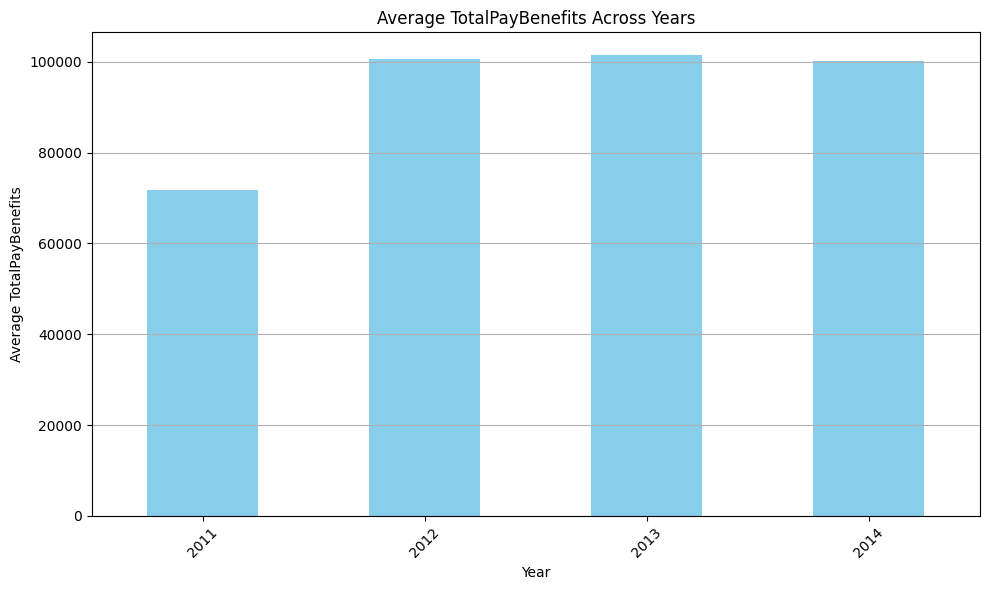

In [26]:
average_totalpaybenefits_per_year = df.groupby('Year')['TotalPayBenefits'].mean()

# Plot the average TotalPayBenefits across years
plt.figure(figsize=(10, 6))
average_totalpaybenefits_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average TotalPayBenefits')
plt.title('Average TotalPayBenefits Across Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# sql code

In [27]:
# SELECT Year, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
# FROM YourTableName
# GROUP BY Year
# ORDER BY Year;

#### Q12: What is the total BasePay for each status (full-time, part-time, etc.)?


# PYTHON CODE

In [28]:
df.groupby('Status')['BasePay'].sum()

Status
FT    2.036280e+09
PT    5.010892e+08
Name: BasePay, dtype: float64

# sql code

In [29]:
# SELECT Status, SUM(BasePay) AS TotalBasePay
# FROM employees
# GROUP BY Status;

#### Q13: How many employees are there for each job title in each agency?


# PYTHON CODE

In [30]:
df.groupby(['Agency', 'JobTitle']).size().reset_index(name='EmployeeCount')

,Agency,JobTitle,EmployeeCount
0,San Francisco,ACCOUNT CLERK,83
1,San Francisco,ACCOUNTANT,5
2,San Francisco,ACCOUNTANT INTERN,48
3,San Francisco,"ACPO,JuvP, Juv Prob (SFERS)",1
4,San Francisco,ACUPUNCTURIST,1
...,...,...,...
2154,San Francisco,X-RAY LABORATORY AIDE,26
2155,San Francisco,X-Ray Laboratory Aide,100
2156,San Francisco,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1
2157,San Francisco,Youth Comm Advisor,4


# sql code

In [31]:
# SELECT Agency, JobTitle, COUNT(EmployeeID) AS EmployeeCount
# FROM YourTableName
# GROUP BY Agency, JobTitle
# ORDER BY Agency, JobTitle;

#### Q14: Which job title has the highest average Benefits?


# PYTHON CODE

In [32]:
average_benefits_by_job = df.groupby('JobTitle')['Benefits'].mean()
highest_average_benefits_job = average_benefits_by_job.idxmax()
highest_average_benefits_value = average_benefits_by_job.max()
print(f"Job Title with the highest average Benefits: {highest_average_benefits_job}")
print(f"Average Benefits: {highest_average_benefits_value}")

Job Title with the highest average Benefits: Chief Investment Officer
Average Benefits: 96570.66


# sql code

In [33]:
# SELECT JobTitle, AVG(Benefits) AS AverageBenefits
# FROM employees
# GROUP BY JobTitle
# ORDER BY AverageBenefits DESC
# LIMIT 1;

#### Q15: What is the ratio of BasePay to TotalPayBenefits for each job title?


# PYTHON CODE

In [34]:
df['BasePayToTotalPayBenefitsRatio'] = df['BasePay'] / df['TotalPayBenefits']

print(df[['JobTitle', 'BasePayToTotalPayBenefitsRatio']])

                                              JobTitle  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1                      CAPTAIN III (POLICE DEPARTMENT)   
2                      CAPTAIN III (POLICE DEPARTMENT)   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
...                                                ...   
148649                                       Custodian   
148650                                    Not provided   
148651                                    Not provided   
148652                                    Not provided   
148653                      Counselor, Log Cabin Ranch   

        BasePayToTotalPayBenefitsRatio  
0                             0.294948  
1                             0.289411  
2                             0.634512  
3                             0.234444  
4                             0.411803  
...                                ...  
148649          

# sql code

In [35]:
# SELECT JobTitle, 
#        SUM(BasePay) / SUM(TotalPayBenefits) AS BasePayToTotalPayBenefitsRatio
# FROM employees
# GROUP BY JobTitle;

#### Q16: Which job title has the highest ratio of BasePay to TotalPayBenefits?


# PYTHON CODE

In [36]:
grouped = df.groupby('JobTitle').sum()

grouped['BasePayToTotalPayBenefitsRatio'] = grouped['BasePay'] / grouped['TotalPayBenefits']

highest_ratio_job = grouped['BasePayToTotalPayBenefitsRatio'].idxmax()
highest_ratio_value = grouped['BasePayToTotalPayBenefitsRatio'].max()

print(f"Job Title with the highest ratio of BasePay to TotalPayBenefits: {highest_ratio_job}")
print(f"Ratio: {highest_ratio_value}")

Job Title with the highest ratio of BasePay to TotalPayBenefits: ADMINISTRATIVE ANALYST III
Ratio: 1.0


# sql code

In [37]:
# SELECT JobTitle, 
#        SUM(BasePay) / SUM(TotalPayBenefits) AS BasePayToTotalPayBenefitsRatio
# FROM employees
# GROUP BY JobTitle
# ORDER BY BasePayToTotalPayBenefitsRatio DESC
# LIMIT 1;

#### Q17: How many years of data are available in the dataset?


# PYTHON CODE

In [38]:
unique_years = df['Year'].unique()
num_years = len(unique_years)
print(f"There are {num_years} years of data available in the dataset.")

There are 4 years of data available in the dataset.


# sql code

In [39]:
# SELECT COUNT(DISTINCT Year) AS NumYears
# FROM YourTableName;

#### Q18: What is the average BasePay for each year and job title combination?


# PYTHON CODE

In [40]:
average_basepay_per_year_jobtitle = df.groupby(['Year', 'JobTitle'])['BasePay'].mean().reset_index()

print(average_basepay_per_year_jobtitle)

      Year                        JobTitle       BasePay
0     2011                   ACCOUNT CLERK  43300.806506
1     2011                      ACCOUNTANT  46643.172000
2     2011               ACCOUNTANT INTERN  28732.663958
3     2011                   ACUPUNCTURIST  66374.400000
4     2011          ADMINISTRATIVE ANALYST  63435.628602
...    ...                             ...           ...
4132  2014      Wire Rope Cable Maint Sprv  93904.720000
4133  2014      Worker's Comp Supervisor 1  54505.333333
4134  2014  Worker's Compensation Adjuster  69915.985385
4135  2014           X-Ray Laboratory Aide  45490.340286
4136  2014              Youth Comm Advisor  32417.420000

[4137 rows x 3 columns]


# sql code

In [41]:
# SELECT Year, JobTitle, AVG(BasePay) AS AverageBasePay
# FROM employees
# GROUP BY Year, JobTitle
# ORDER BY Year, JobTitle;

#### Q19: How many employees have a TotalPayBenefits greater than $326373.19??


# PYTHON CODE

In [42]:
num_employees_greater_than_threshold = len(df[df['TotalPayBenefits'] > 326373.19])

print(f"The number of employees with TotalPayBenefits greater than $326373.19 is {num_employees_greater_than_threshold}.")


The number of employees with TotalPayBenefits greater than $326373.19 is 144.


# sql code

In [43]:
# SELECT COUNT(*) AS NumEmployees
# FROM YourTableName
# WHERE TotalPayBenefits > 326373.19;

#### Q20: Which agency has the highest average TotalPayBenefits?


# PYTHON CODE

In [44]:
average_totalpaybenefits_per_agency = df.groupby('Agency')['TotalPayBenefits'].mean().reset_index()

# Find the agency with the highest average 'TotalPayBenefits'
agency_highest_average_totalpaybenefits = average_totalpaybenefits_per_agency.loc[average_totalpaybenefits_per_agency['TotalPayBenefits'].idxmax()]

print(agency_highest_average_totalpaybenefits)

Agency              San Francisco
TotalPayBenefits     93692.554811
Name: 0, dtype: object


# sql code

In [45]:
# SELECT Agency, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
# FROM YourTableName
# GROUP BY Agency
# ORDER BY AverageTotalPayBenefits DESC
# LIMIT 1;

output data 

In [48]:
df.to_csv('output.csv', index=False)
